## Add MPI support to l1dbproto

Small re-factoring of ap_proto script to run as many MPI processes instead of forking. One obvious benefit to use more cores than available on a single machine. Second is that processes can keep database connection open across multiple visits.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

import plots
plots.plot_width = 10

# plots to draw in do_plots_all()
all_plots = ['select_real', 'store_real',
             'obj_select_real', 'obj_last_insert_real',
             'obj_insert_real', 'obj_store',
             'src_select_real', 'src_insert_real',
             'fsrc_select_real', 'fsrc_insert_real']
whiskers = 4.

C:\Users\salnikov\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


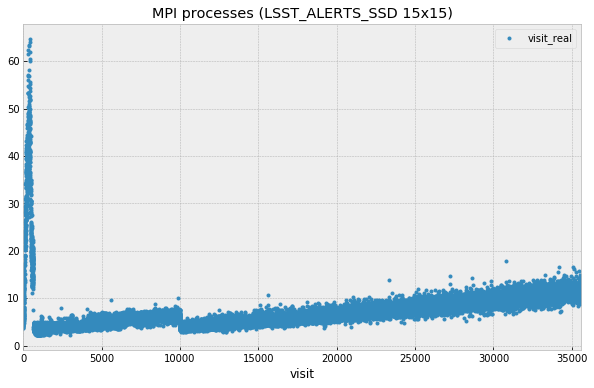

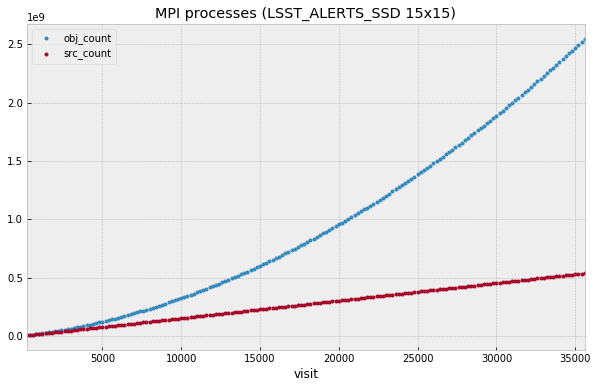

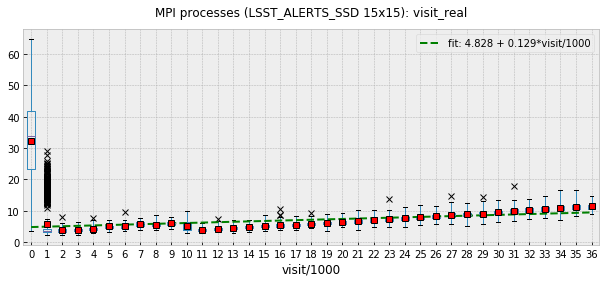

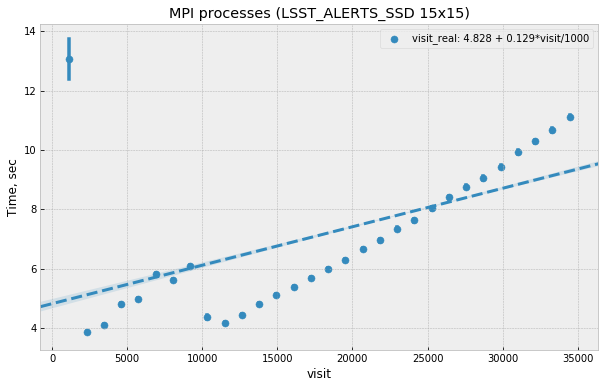

In [2]:
csv = "data/dm-16404-oracle-ssd-mpi2-20181121T171755.csv.gz"
title = "MPI processes (LSST_ALERTS_SSD 15x15)"
ds = plots.do_plots(csv, title, bin=1000, filter_count=True, whis=whiskers)

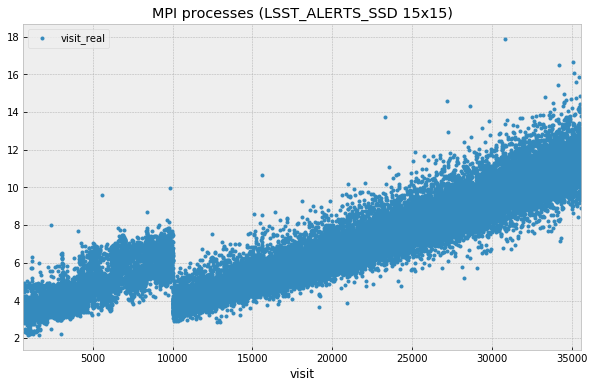

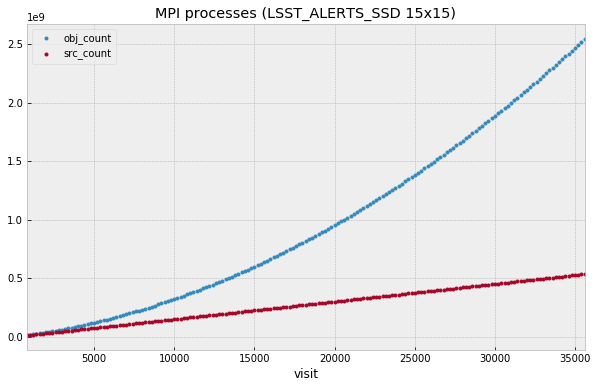

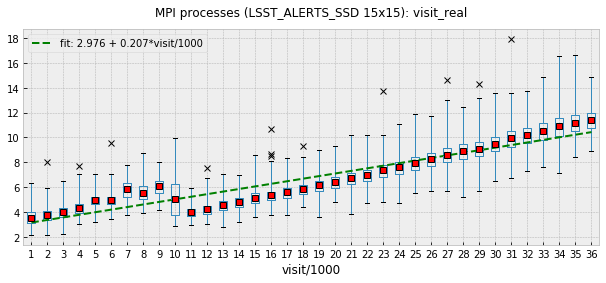

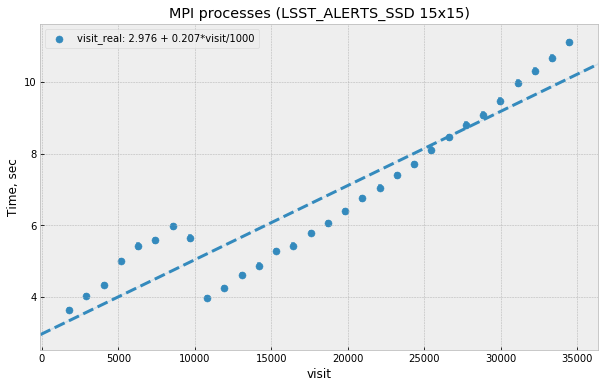

In [3]:
bad_visits = list(range(1, 650))
plots.do_plots(csv, title, bin=1000, filter_count=True, bad_visits=bad_visits, whis=whiskers);

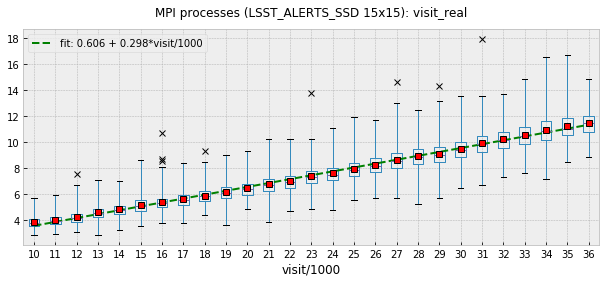

In [4]:
ds1 = ds[10000:].copy()
axes = plots.do_boxplot(ds1, "visit/1000", ["visit_real"], bin=1000, title=title, whis=whiskers)

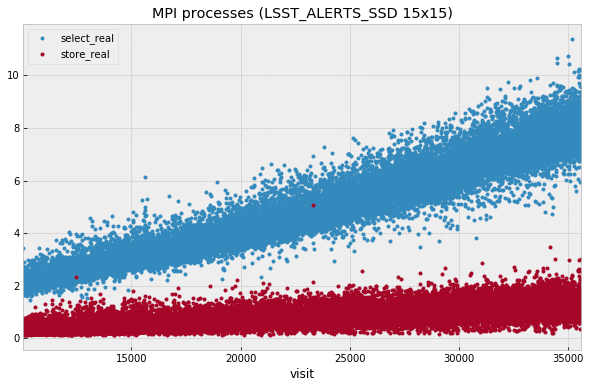

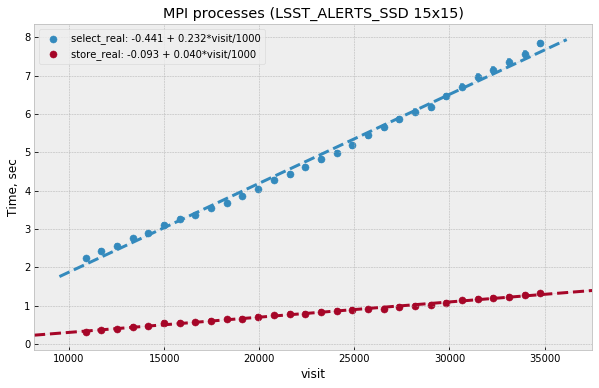

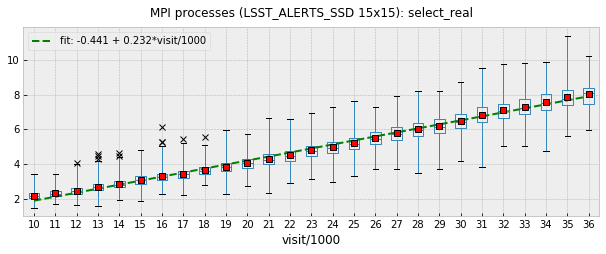

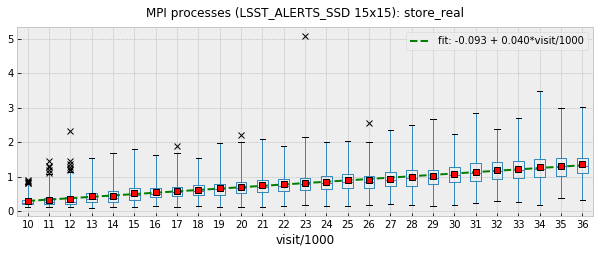

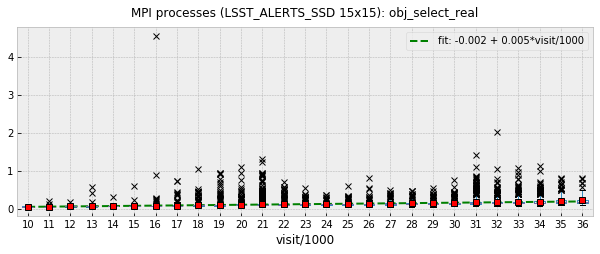

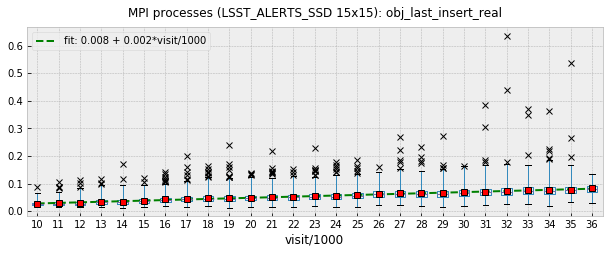

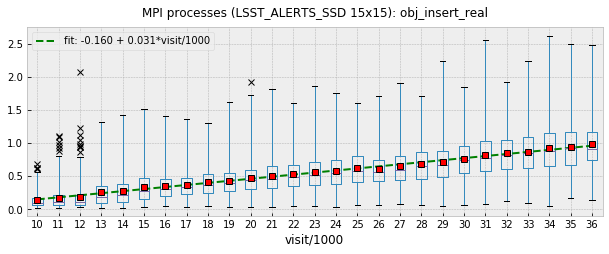

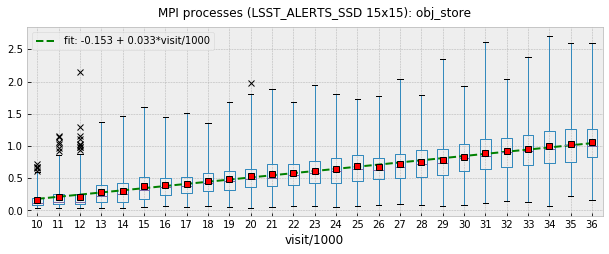

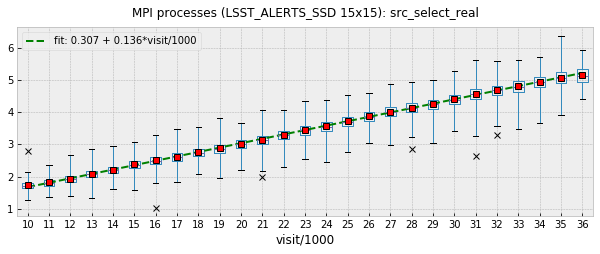

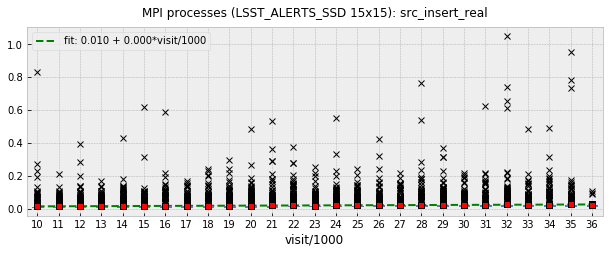

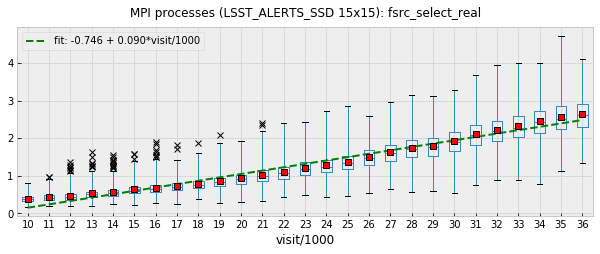

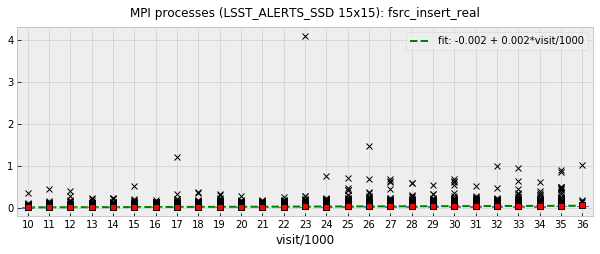

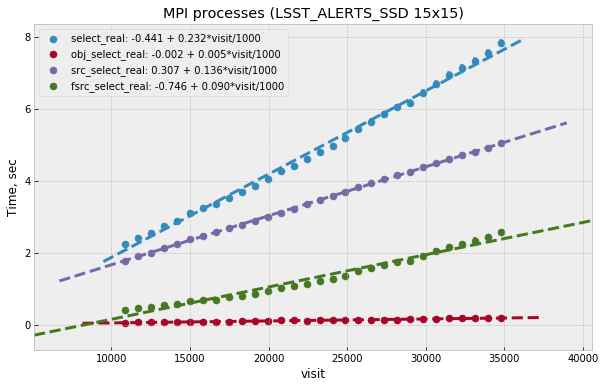

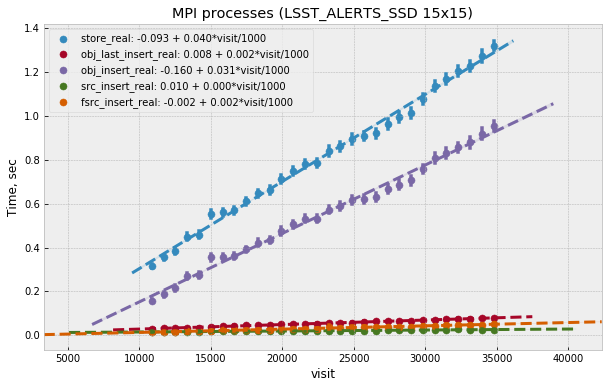

In [5]:
plots.do_plots_all(ds1, title, bin=1000, filter_count=True, plots=all_plots, whis=whiskers);

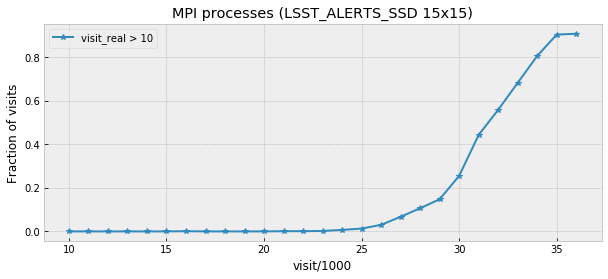

In [6]:
plots.plot_fraction_above(ds1, "visit/1000", bin=1000, title=title)